In [90]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib  inline

In [2]:
os.chdir(r'D:\360downloads\OnlineNewsPopularity\OnlineNewsPopularity')

In [5]:
os.listdir()

['OnlineNewsPopularity.csv', 'OnlineNewsPopularity.names']

In [50]:
with open('OnlineNewsPopularity.names',encoding='utf8') as f:
    for i in f.readlines():
        print(i)

1. Title: Online News Popularity



2. Source Information

    -- Creators: Kelwin Fernandes (kafc ‘@’ inesctec.pt, kelwinfc ’@’ gmail.com),

                 Pedro Vinagre (pedro.vinagre.sousa ’@’ gmail.com) and

                 Pedro Sernadela

   -- Donor: Kelwin Fernandes (kafc ’@’ inesctec.pt, kelwinfc '@' gmail.com)

   -- Date: May, 2015



3. Past Usage:

    1. K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision

       Support System for Predicting the Popularity of Online News. Proceedings

       of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence,

       September, Coimbra, Portugal.



       -- Results: 

          -- Binary classification as popular vs unpopular using a decision

             threshold of 1400 social interactions.

          -- Experiments with different models: Random Forest (best model),

             Adaboost, SVM, KNN and Naïve Bayes.

          -- Recorded 67% of accuracy and 0.73 of AUC.

    - Predicted

In [27]:
data = pd.read_csv('OnlineNewsPopularity.csv')
data.drop(['url',' timedelta'],axis='columns',inplace=True)

In [28]:
data

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [29]:
data.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [41]:
data[' shares'] = (data[' shares']>2800).astype('int')

In [43]:
data[' shares'].value_counts()

0    30014
1     9630
Name:  shares, dtype: int64

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 59 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0    n_tokens_title                 39644 non-null  float64
 1    n_tokens_content               39644 non-null  float64
 2    n_unique_tokens                39644 non-null  float64
 3    n_non_stop_words               39644 non-null  float64
 4    n_non_stop_unique_tokens       39644 non-null  float64
 5    num_hrefs                      39644 non-null  float64
 6    num_self_hrefs                 39644 non-null  float64
 7    num_imgs                       39644 non-null  float64
 8    num_videos                     39644 non-null  float64
 9    average_token_length           39644 non-null  float64
 10   num_keywords                   39644 non-null  float64
 11   data_channel_is_lifestyle      39644 non-null  float64
 12   data_channel_is_entertainment  

In [53]:
data.drop([' global_sentiment_polarity',' global_rate_negative_words',' min_positive_polarity',' max_negative_polarity'],axis=1,inplace=True)

In [55]:
from sklearn.ensemble import RandomForestClassifier
X = data.drop(' shares',axis=1)
y = data[' shares']

In [60]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X,y)

RandomForestClassifier()

In [61]:
clf.feature_importances_

array([0.01897566, 0.02951763, 0.03035172, 0.00017702, 0.02976703,
       0.02362946, 0.01501935, 0.01682538, 0.00928627, 0.03024404,
       0.01122072, 0.0019686 , 0.00368737, 0.00218991, 0.00369972,
       0.00338724, 0.0038476 , 0.00541236, 0.02830223, 0.03118047,
       0.01872581, 0.00646274, 0.0327209 , 0.02641229, 0.04419592,
       0.05190778, 0.03005852, 0.02565157, 0.03131219, 0.00326118,
       0.00358047, 0.00354059, 0.00346084, 0.00334993, 0.00284688,
       0.00299471, 0.00543759, 0.03130968, 0.03063628, 0.03167253,
       0.03132095, 0.03038112, 0.03083399, 0.02872133, 0.02324845,
       0.02357503, 0.0291108 , 0.01160553, 0.02687333, 0.01648677,
       0.01502254, 0.01758576, 0.01282801, 0.01417819])

In [72]:
arr = [*zip(X.columns,clf.feature_importances_)]
arr.sort(key=lambda x:x[1],reverse=True)

In [78]:
results = []
for i in arr[:20]:
    results.append(i[0])

In [84]:
for i in X.columns:
    if i not in results:
        X.drop(i,axis=1,inplace=True)

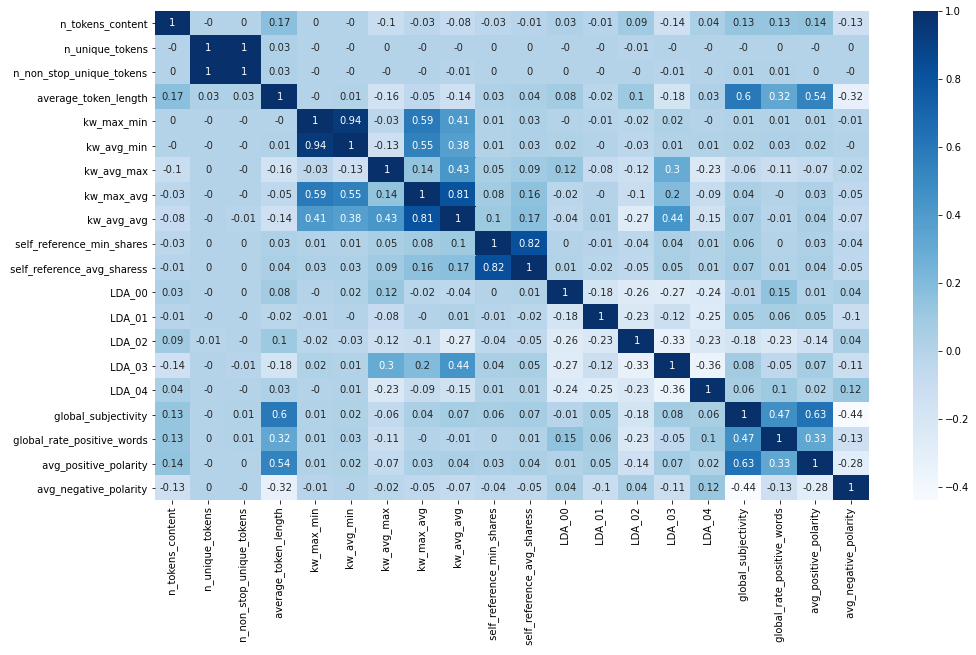

In [92]:
plt.figure(figsize=(16,9))
sns.heatmap(round(X.corr(),2), cmap='Blues', annot=True)


In [93]:
X.drop([' kw_avg_min'],axis=1,inplace=True)

In [94]:
X

,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,average_token_length,kw_max_min,kw_avg_max,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_avg_sharess,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_rate_positive_words,avg_positive_polarity,avg_negative_polarity
0,219.0,0.663594,0.815385,4.680365,0.0,0.000000,0.000000,0.000000,496.0,496.000000,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.045662,0.378636,-0.350000
1,255.0,0.604743,0.791946,4.913725,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.043137,0.286915,-0.118750
2,211.0,0.575130,0.663866,4.393365,0.0,0.000000,0.000000,0.000000,918.0,918.000000,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.056872,0.495833,-0.466667
3,531.0,0.503788,0.665635,4.404896,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.041431,0.385965,-0.369697
4,1072.0,0.415646,0.540890,4.682836,0.0,0.000000,0.000000,0.000000,545.0,3151.157895,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.074627,0.411127,-0.220192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,346.0,0.529052,0.684783,4.523121,671.0,374962.500000,4004.342857,3031.115764,11400.0,37033.333333,0.025038,0.025001,0.151701,0.025000,0.773260,0.482679,0.037572,0.333791,-0.260000
39640,328.0,0.696296,0.885057,4.405488,616.0,192985.714286,5470.168651,3411.660830,2100.0,2100.000000,0.029349,0.028575,0.231866,0.681635,0.028575,0.564374,0.039634,0.374825,-0.211111
39641,442.0,0.516355,0.644128,5.076923,691.0,295850.000000,6880.687034,4206.439195,1400.0,1400.000000,0.159004,0.025025,0.025207,0.643794,0.146970,0.510296,0.033937,0.307273,-0.356439
39642,682.0,0.539493,0.692661,4.975073,0.0,254600.000000,3384.316871,1777.895883,452.0,452.000000,0.040004,0.040003,0.839987,0.040002,0.040004,0.358578,0.020528,0.236851,-0.205246


In [102]:
X.loc[:,' n_tokens_content'].min()

0.0

(array([3.2349e+04, 6.1670e+03, 8.8600e+02, 1.6800e+02, 4.6000e+01,
        1.3000e+01, 4.0000e+00, 3.0000e+00, 6.0000e+00, 2.0000e+00]),
 array([   0. ,  847.4, 1694.8, 2542.2, 3389.6, 4237. , 5084.4, 5931.8,
        6779.2, 7626.6, 8474. ]),
 <a list of 10 Patch objects>)

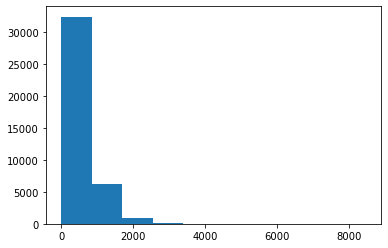

In [113]:
plt.hist(X.loc[:,' n_tokens_content'])

(array([7.669e+03, 1.626e+03, 2.440e+02, 5.900e+01, 2.100e+01, 6.000e+00,
        0.000e+00, 1.000e+00, 3.000e+00, 1.000e+00]),
 array([   0. ,  847.4, 1694.8, 2542.2, 3389.6, 4237. , 5084.4, 5931.8,
        6779.2, 7626.6, 8474. ]),
 <a list of 10 Patch objects>)

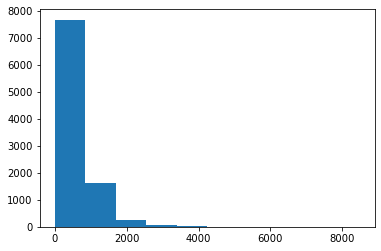

In [111]:
plt.hist(X.loc[y==1,' n_tokens_content'])

In [110]:
X.loc[y==1,' n_tokens_content']

8          97.0
13        285.0
16       1118.0
17        397.0
18        103.0
          ...  
39612     735.0
39615       0.0
39621     468.0
39622    1122.0
39624     429.0
Name:  n_tokens_content, Length: 9630, dtype: float64